## Laptop details dataset


In [293]:
  ### use this code to see only code and not output: 
# %%HTML
# <style>
#     .output {
#         display: none;
#     }
# </style>

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [295]:
laptop_data = pd.read_csv("laptop_detail.csv")

In [296]:
laptop_data.info()
laptop_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [297]:
laptop_data.head(4)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [298]:
laptop_data = laptop_data.drop(laptop_data.columns[0],axis=1)

In [299]:
laptop_data.head(3)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946


In [300]:
laptop_data.isnull().sum().to_frame().rename(columns={0:'total number of missing values'})

,total number of missing values
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


In [301]:
laptop_data = laptop_data.dropna()
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    229 non-null    object 
 1   Category        229 non-null    int64  
 2   Screen          229 non-null    object 
 3   GPU             229 non-null    int64  
 4   OS              229 non-null    int64  
 5   CPU_core        229 non-null    int64  
 6   Screen_Size_cm  229 non-null    float64
 7   CPU_frequency   229 non-null    float64
 8   RAM_GB          229 non-null    int64  
 9   Storage_GB_SSD  229 non-null    int64  
 10  Weight_kg       229 non-null    float64
 11  Price           229 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 23.3+ KB


In [302]:
print("Duplicated Values: ", laptop_data.duplicated().sum())

Duplicated Values:  0


In [303]:
laptop_data['Manufacturer'].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

# EXPLORATORY DATA ANALYSIS


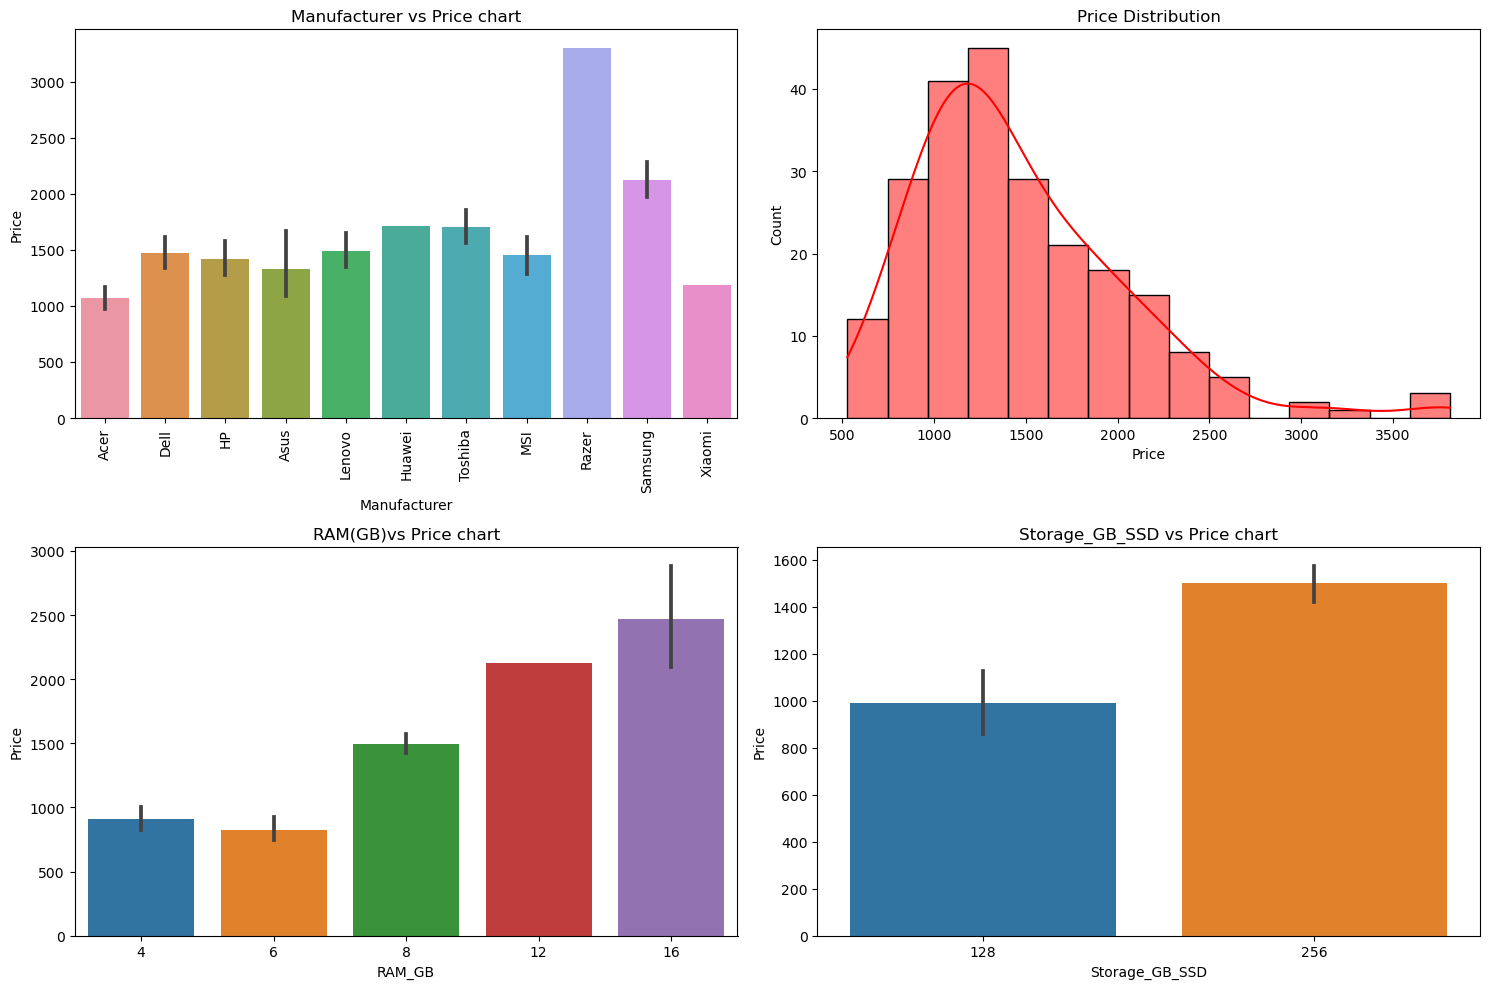

In [304]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(x='Manufacturer',y='Price',data=laptop_data)
plt.title("Manufacturer vs Price chart")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(laptop_data['Price'],color='red',kde=True)
plt.title("Price Distribution")

plt.subplot(2,2,3)
sns.barplot(x='RAM_GB',y='Price',data=laptop_data)
plt.title("RAM(GB)vs Price chart")

plt.subplot(2,2,4)
sns.barplot(x='Storage_GB_SSD',y='Price',data=laptop_data)
plt.title("Storage_GB_SSD vs Price chart")

plt.tight_layout()

Text(0.5, 1.0, 'Weight vs Price chart')

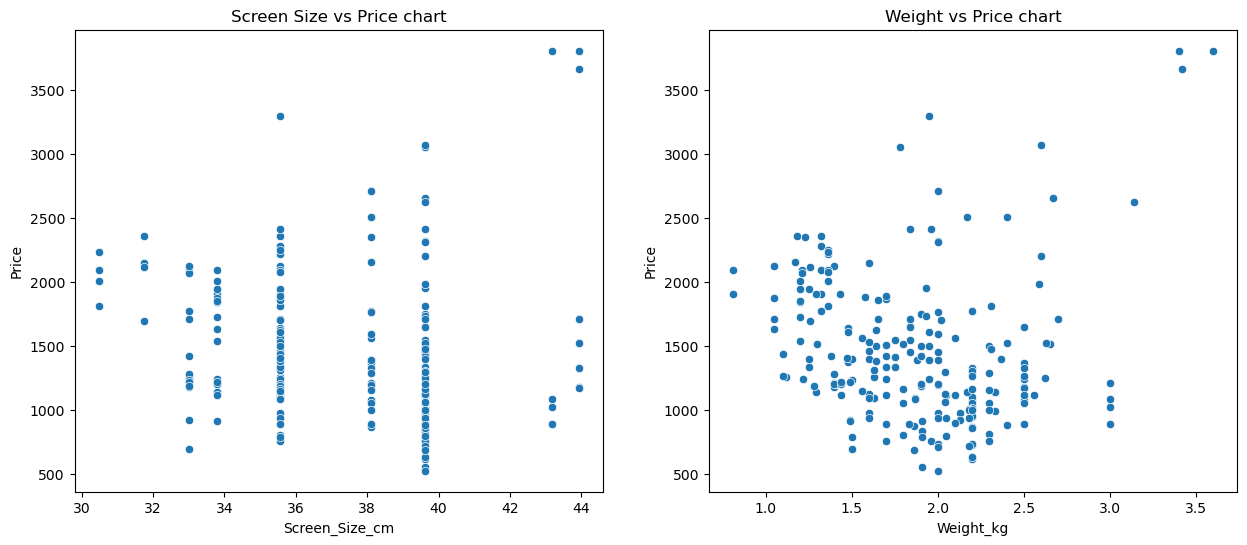

In [305]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Screen_Size_cm',y='Price',data=laptop_data)
plt.title("Screen Size vs Price chart")

plt.subplot(1,2,2)
sns.scatterplot(x='Weight_kg',y='Price',data=laptop_data)
plt.title("Weight vs Price chart")

<Axes: >

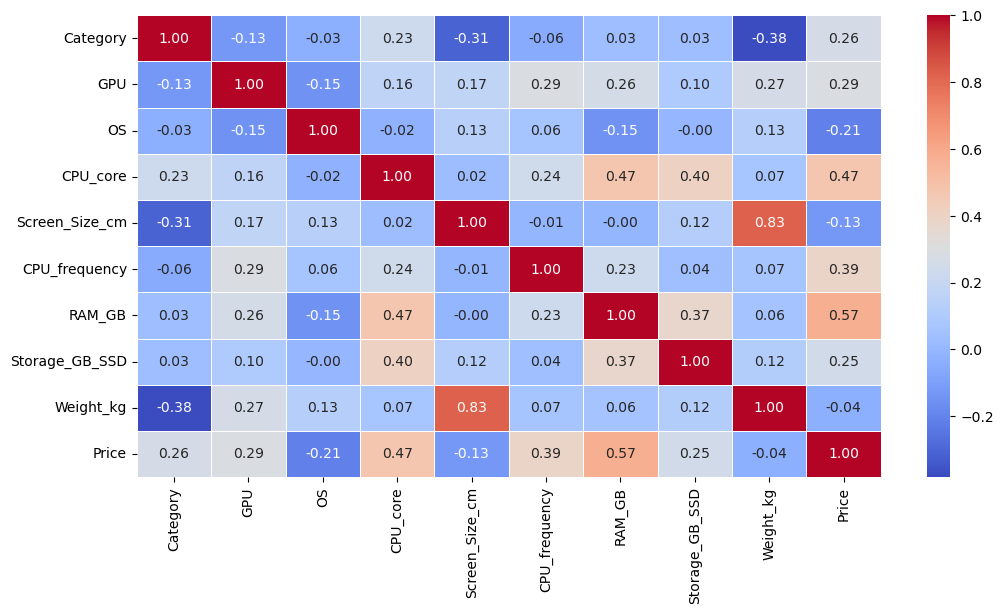

In [306]:
numeric_columns =  laptop_data.select_dtypes(include=['int','float'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12,6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Data Preprocessing 

In [307]:
laptop_data = pd.get_dummies(laptop_data, columns = ['Manufacturer','Screen'], dummy_na=False)

# Convert True/False values to 0/1
laptop_data = laptop_data.astype(int)
laptop_data.head()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,...,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi,Screen_Full HD,Screen_IPS Panel
0,4,2,1,5,35,1,8,256,1,978,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,3,39,2,4,256,2,634,...,0,0,0,0,0,0,0,0,1,0
2,3,1,1,7,39,2,8,256,2,946,...,0,0,0,0,0,0,0,0,1,0
3,4,2,1,5,33,1,8,128,1,1244,...,0,0,0,0,0,0,0,0,0,1
4,4,2,1,7,39,1,8,256,1,837,...,1,0,0,0,0,0,0,0,1,0


In [308]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# num_columns = ['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 
#                'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']

num_columns = ['GPU','CPU_core', 'RAM_GB', 'Storage_GB_SSD']

laptop_data[num_columns] =  scaler.fit_transform(laptop_data[num_columns])
laptop_data.head()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,...,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi,Screen_Full HD,Screen_IPS Panel
0,4,-0.247565,1,-0.497368,35,1,0.053442,0.300793,1,978,...,0,0,0,0,0,0,0,0,0,1
1,3,-1.822350,1,-2.101554,39,2,-1.578322,0.300793,2,634,...,0,0,0,0,0,0,0,0,1,0
2,3,-1.822350,1,1.106818,39,2,0.053442,0.300793,2,946,...,0,0,0,0,0,0,0,0,1,0
3,4,-0.247565,1,-0.497368,33,1,0.053442,-3.324550,1,1244,...,0,0,0,0,0,0,0,0,0,1
4,4,-0.247565,1,1.106818,39,1,0.053442,0.300793,1,837,...,1,0,0,0,0,0,0,0,1,0


# Correlation Matrix

In [309]:
correlation_matrix = laptop_data.corr()
correlation_with_target = correlation_matrix['Price'].abs().sort_values(ascending=False)
print(correlation_with_target)

Price                   1.000000
RAM_GB                  0.573947
CPU_core                0.472225
GPU                     0.290442
Category                0.263302
Storage_GB_SSD          0.246707
CPU_frequency           0.213117
Manufacturer_Razer      0.212971
OS                      0.212871
Manufacturer_Acer       0.205400
Manufacturer_Samsung    0.155463
Screen_Size_cm          0.135842
Manufacturer_Toshiba    0.121310
Weight_kg               0.067551
Manufacturer_Asus       0.066937
Screen_IPS Panel        0.046108
Screen_Full HD          0.046108
Manufacturer_Lenovo     0.032799
Manufacturer_HP         0.032191
Manufacturer_Xiaomi     0.031256
Manufacturer_Huawei     0.029540
Manufacturer_Dell       0.017757
Manufacturer_MSI        0.001320
Name: Price, dtype: float64


In [310]:
X = laptop_data.drop(['Price','Weight_kg','Screen_IPS Panel','Screen_Full HD'],axis=1)
y = laptop_data["Price"]

X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              229 non-null    int32  
 1   GPU                   229 non-null    float64
 2   OS                    229 non-null    int32  
 3   CPU_core              229 non-null    float64
 4   Screen_Size_cm        229 non-null    int32  
 5   CPU_frequency         229 non-null    int32  
 6   RAM_GB                229 non-null    float64
 7   Storage_GB_SSD        229 non-null    float64
 8   Manufacturer_Acer     229 non-null    int32  
 9   Manufacturer_Asus     229 non-null    int32  
 10  Manufacturer_Dell     229 non-null    int32  
 11  Manufacturer_HP       229 non-null    int32  
 12  Manufacturer_Huawei   229 non-null    int32  
 13  Manufacturer_Lenovo   229 non-null    int32  
 14  Manufacturer_MSI      229 non-null    int32  
 15  Manufacturer_Razer    229 no

In [311]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.08,random_state=42)

print("X_train - >  ",X_train.shape)
print("X_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

X_train - >   (210, 19)
X_test - >   (19, 19)
y_train - >   (210,)
y_test - >   (19,)


# All Model Importing

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn import metrics
from sklearn.metrics import r2_score



In [313]:

model_classes = {
    "Linear Regression": LinearRegression,
    "Decision Tree": DecisionTreeRegressor,
    "Random Forest": RandomForestRegressor, 
    "Gradient Boost": GradientBoostingRegressor,
    "XGBoost": XGBRegressor,
    

}

trained_models = {}
results = []
training_scores = []  # List to store training scores
testing_scores = []   # List to store testing scores


    
for model_name, model_class in model_classes.items():
    model_instance = model_class()
        
    model_instance.fit(X_train, y_train)
    X_train_pred = model_instance.predict(X_train)
    predicted_value = model_instance.predict(X_test)
    training_score = r2_score(y_train, X_train_pred) * 100
    testing_score = r2_score(y_test, predicted_value) * 100
        
    print()
    print(f"Model Name: {model_name}")
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_value))
    percentage_rmse = (rmse / laptop_data['Price'].mean()) * 100

    print(f"RMSE for {model_name} is: {rmse:.2f} ({percentage_rmse:.2f}%)")
    
    print(f"The r2 Score of {model_name} on training data is: {training_score}")
    print(f"The r2 Score of {model_name} on testing data is: {testing_score}")
        
    trained_models[model_name] = model_instance
        
    results.append({
        'Algorithm': model_name,
        'training_score': training_score,
        'testing_score': testing_score
    })
    
    # Append scores to the lists
    training_scores.append(training_score)
    testing_scores.append(testing_score)
    
# Converting the results to a DataFrame for better presentation
results_df = pd.DataFrame(results)


print(results_df)

model_instance = [model_classes[model_name]() for model_name in model_classes]
    



Model Name: Linear Regression
RMSE for Linear Regression is: 333.50 (22.87%)
The r2 Score of Linear Regression on training data is: 57.03700182539907
The r2 Score of Linear Regression on testing data is: 64.79211536632826

Model Name: Decision Tree
RMSE for Decision Tree is: 455.63 (31.24%)
The r2 Score of Decision Tree on training data is: 94.76760803230057
The r2 Score of Decision Tree on testing data is: 34.28639848915574

Model Name: Random Forest
RMSE for Random Forest is: 393.10 (26.95%)
The r2 Score of Random Forest on training data is: 90.59672367774672
The r2 Score of Random Forest on testing data is: 51.08352872767858

Model Name: Gradient Boost
RMSE for Gradient Boost is: 364.96 (25.02%)
The r2 Score of Gradient Boost on training data is: 84.36329259785944
The r2 Score of Gradient Boost on testing data is: 57.8362467150279

Model Name: XGBoost
RMSE for XGBoost is: 399.88 (27.42%)
The r2 Score of XGBoost on training data is: 94.64632557926332
The r2 Score of XGBoost on testi

In [314]:
model_names = ["Linear Regression","Decision Tree","Random Forest","Gradient Boost","XGBoost"]

show_results = pd.DataFrame({"Algorithm":model_names,
                           "training_score":training_scores,
                           "testing_score":testing_scores})
show_results

,Algorithm,training_score,testing_score
0,Linear Regression,57.037002,64.792115
1,Decision Tree,94.767608,34.286398
2,Random Forest,90.596724,51.083529
3,Gradient Boost,84.363293,57.836247
4,XGBoost,94.646326,49.381786


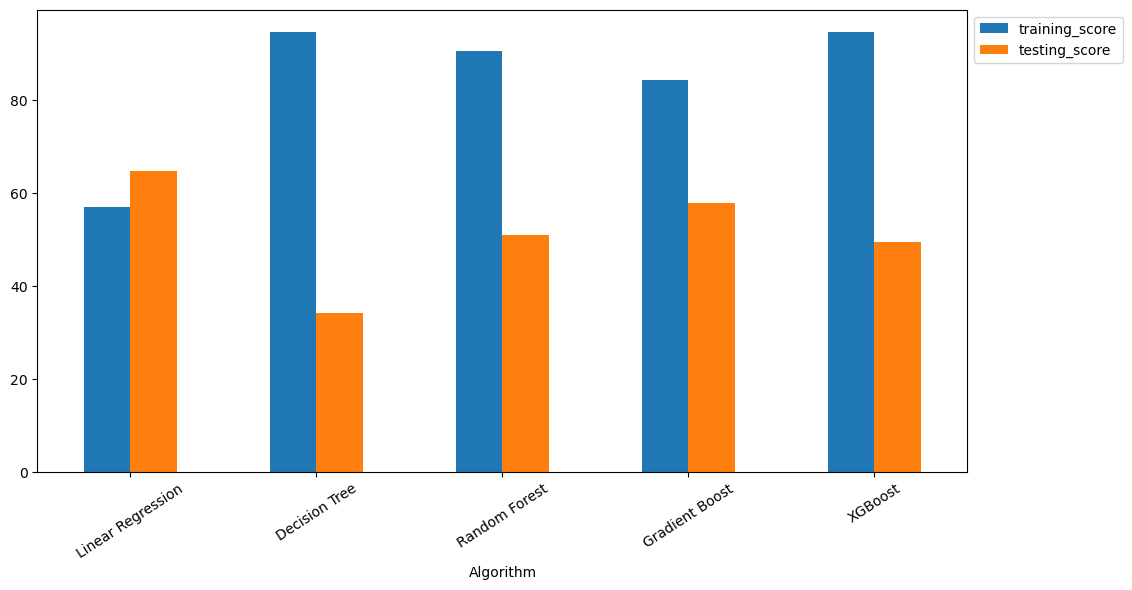

In [315]:
show_results.plot(x='Algorithm',y=['training_score','testing_score'],kind='bar',figsize=(12,6))
plt.xticks(rotation=33)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [316]:
import plotly.express as px


fig = px.bar(show_results, x='Algorithm', y=['training_score', 'testing_score'],
             labels={'value': 'R2 Score (%)'},
             title='Training and Testing Scores for Different Algorithms',
             width=800, height=500)



fig.show()


In [317]:
Manufacturer = input("Enter the Company Name: ")
GPU = input("Enter GPU:  ")
CPU_core = input("Enter Number of CPU core in Laptop: ")
RAM_GB = input("Enter RAM Size of Laptop in GB: ")
Storage_GB_SSD = input("Enter Storage of SSD in GB: ")


user_input_data = pd.DataFrame({'Manufacturer':[Manufacturer],'GPU':[GPU],'CPU_core':[CPU_core],
                                'RAM_GB':[RAM_GB], 'Storage_GB_SSD':[Storage_GB_SSD ]})

#  To Ensure 'num_columns' are present and in the correct order
user_input_data[['GPU','CPU_core', 'RAM_GB', 'Storage_GB_SSD']] = scaler.transform(user_input_data[['GPU','CPU_core', 'RAM_GB', 'Storage_GB_SSD']])


X_input = pd.get_dummies(user_input_data, columns=['Manufacturer'], dummy_na=False)

# Reindex the columns to match the order during training
X_input = X_input.reindex(columns=X_train.columns, fill_value=0)


for model_name, model_instance in trained_models.items():
    Predicted_Price = model_instance.predict(X_input)
    
    # Reshape the Predicted_Price array
    Predicted_Price_2d = Predicted_Price.reshape(-1, 1)
    
    print()
    print(f'Predicted Price using {model_name}: {Predicted_Price_2d[0][0]:.2f}')




Enter the Company Name: Acer
Enter GPU:  2
Enter Number of CPU core in Laptop: 5
Enter RAM Size of Laptop in GB: 8
Enter Storage of SSD in GB: 256

Predicted Price using Linear Regression: 511.54

Predicted Price using Decision Tree: 1256.00

Predicted Price using Random Forest: 1540.56

Predicted Price using Gradient Boost: 1463.36

Predicted Price using XGBoost: 1587.89
